In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

fuel_econ = pd.read_csv('fuel-econ.csv')
fuel_econ.head(2)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6


###  **TO DO**
Use a plot to explore whether or not there are differences in recommended fuel type depending on the vehicle class. Only investigate the difference between the two main fuel types found in the 'fuelType' variable: Regular Gasoline and Premium Gasoline. (The other fuel types represented in the dataset are of much lower frequency compared to the main two, that they'll be more distracting than informative.) 


**Note**: The dataset as provided does not retain any of the sorting of the 'VClass' variable, so you will also need to copy over any code you used previously to sort the category levels.

In [13]:
# Types of sedan cars
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

# Returns the types for sedan_classes with the categories and orderedness
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

In [14]:
# Filter on Premium or Regular Gasoline
fuel_econ_sub = fuel_econ.loc[fuel_econ['fuelType'].isin(['Premium Gasoline', 'Regular Gasoline'])]

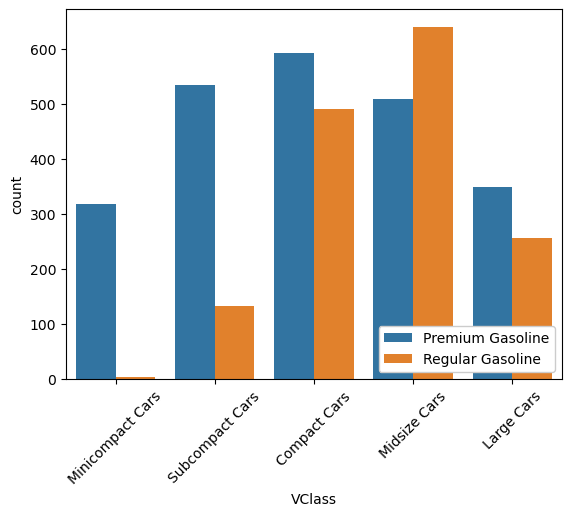

In [19]:
ax = sns.countplot(data=fuel_econ_sub, x='VClass', hue='fuelType')
ax.legend(loc=4, framealpha=1) # lower right no transparency
plt.xticks(rotation=45);

I chose a clustered bar chart instead of a heat map in this case since there weren't a lot of numbers to plot. If you chose a heat map, did you remember to add a color bar and include annotations? From this plot, you can see that more cars use premium gas over regular gas, and that the smaller cars are biased towards the premium gas grade. It is only in midsize sedans where regular gasoline was used in more cars than premium gasoline.